# Purchasing Power Parity


In [2]:
# https://www.bfs.admin.ch/bfs/de/home/statistiken/preise/landesindex-konsumentenpreise.assetdetail.29065706.html
# Die columns zwischen Datum und den Prozentanzahlen zeigen die Veränderungen, skaliert auf das jeweilige Jahr als Basisjahr
# % m-1 zeigt die monatliche Veränderung und m-12 zeigt die jährliche Veränderung

import pandas as pd

# Set start and end date
start_date = "2021-09-28"
end_date = "2023-11-08"


ppp = pd.read_excel("Konsumentenpreise_CH.xlsx")
ppp["Datum / Date"] = pd.to_datetime(ppp["Datum / Date"], format="%Y-%m-%d")
ppp = ppp.loc[(ppp["Datum / Date"] >= "2021-07-30") & (ppp["Datum / Date"] <= end_date)]

ppp = ppp.iloc[:, [0, 11]].set_index("Datum / Date")

ppp.columns = ["PPP"]
ppp.rename_axis('Date', inplace = True)
ppp.index = ppp.index + pd.offsets.MonthEnd(0)

ppp.head()

,PPP
Date,
2021-08-31,101.3
2021-09-30,101.3
2021-10-31,101.6
2021-11-30,101.6
2021-12-31,101.5


In [11]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()


ppp["PPP"] = scaler.fit_transform(ppp["PPP"].values.reshape(-1, 1))
display(ppp.head())

,PPP
Date,
2021-08-31,0.000000
2021-09-30,0.000000
2021-10-31,0.058824
2021-11-30,0.058824
2021-12-31,0.039216


In [12]:
ppp_to_hour = ppp.resample("H").ffill()
ppp_to_hour = ppp_to_hour.reset_index()
ppp = ppp_to_hour.loc[(ppp_to_hour["Date"] >= start_date) & (ppp_to_hour["Date"] <= end_date)]
ppp.set_index("Date", inplace = True)

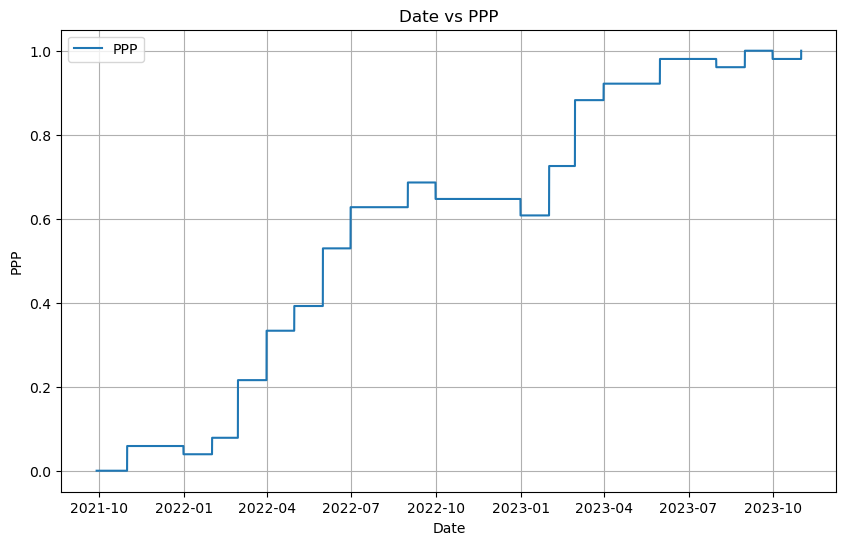

In [13]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ppp.index, ppp["PPP"], label = "PPP")

# Formatting
plt.title('Date vs PPP')
plt.xlabel('Date')
plt.ylabel('PPP')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
ppp.to_csv("ppp_scaled.csv")